In [1]:
import pandas as pd
import numpy as np
import os

In [22]:
rootdir = 'Amazon_Reviews/'
all_reviews = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        df = pd.read_csv(os.path.join(subdir,file))
        df["Product"] = np.matlib.repmat(file,df.shape[0],1)
        all_reviews.append(df)
        print(df.head())
all_reviews_df = pd.concat(all_reviews)

                                              title  \
0  Not style pictured, handles made for baby hands.   
1                               Not made for adults   
2        Hot Liquids Take on a Strong Plastic Taste   
3                                    WASTE OF MONEY   
4                                           Useless   

                                              review                star  \
0  I also received the cup with the tiny handles ...  1.0 out of 5 stars   
1  This cup is being sold as an Adult cup, it is ...  1.0 out of 5 stars   
2  This cup is fine for cold liquids, but if you ...  2.0 out of 5 stars   
3  After reading the reviews, only a handful rece...  1.0 out of 5 stars   
4  This was definitely designed as a kids sippy c...  1.0 out of 5 stars   

           Product  
0  soupsammons.csv  
1  soupsammons.csv  
2  soupsammons.csv  
3  soupsammons.csv  
4  soupsammons.csv  
                                               title  \
0  This is an amazing product 

In [23]:
all_reviews_df

,title,review,star,Product
0,"Not style pictured, handles made for baby hands.",I also received the cup with the tiny handles ...,1.0 out of 5 stars,soupsammons.csv
1,Not made for adults,"This cup is being sold as an Adult cup, it is ...",1.0 out of 5 stars,soupsammons.csv
2,Hot Liquids Take on a Strong Plastic Taste,"This cup is fine for cold liquids, but if you ...",2.0 out of 5 stars,soupsammons.csv
3,WASTE OF MONEY,"After reading the reviews, only a handful rece...",1.0 out of 5 stars,soupsammons.csv
4,Useless,This was definitely designed as a kids sippy c...,1.0 out of 5 stars,soupsammons.csv
...,...,...,...,...
136,Highly recommend,Great products for the elderly. Especially on...,5.0 out of 5 stars,soupindependenceplastic.csv
137,great cup,excellent design. well constructed. very hel...,5.0 out of 5 stars,soupindependenceplastic.csv
138,Safe Cups,My husband feels more confident with his tea a...,5.0 out of 5 stars,soupindependenceplastic.csv
139,A great adult sippy cup.,A great adult sippy cup.,5.0 out of 5 stars,soupindependenceplastic.csv


In [24]:
list_of_products = all_reviews_df.Product.unique()

In [25]:
list_of_products

array(['soupsammons.csv', 'soupsafestrawthick.csv',
       'soupsafestrawthin.csv', 'soupkirimon.csv', 'soupprovale.csv',
       'soupbionixthick.csv', 'soupbionixthin.csv', 'soupirije.csv',
       'soupsp.csv', 'soupikinsman.csv', 'soupiweightedbase.csv',
       'soupindependenceplastic.csv'], dtype=object)

In [31]:
from textblob import TextBlob
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


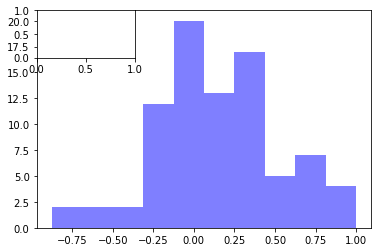

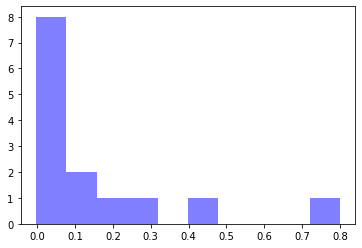

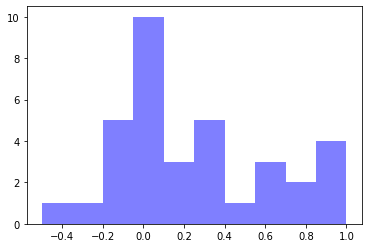

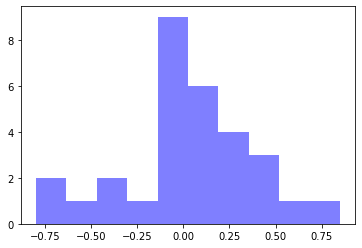

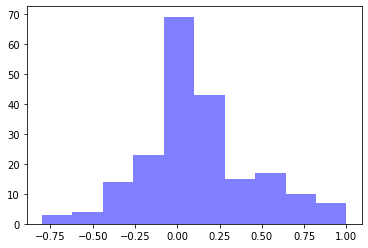

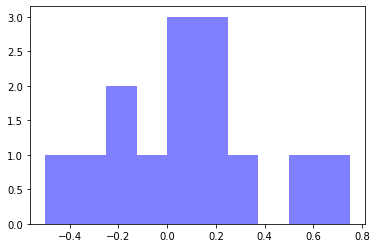

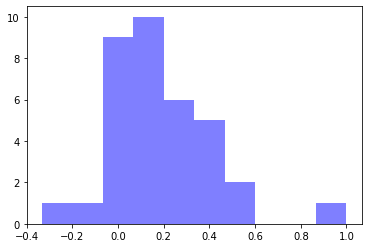

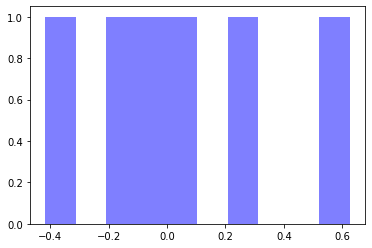

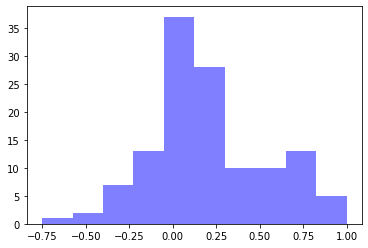

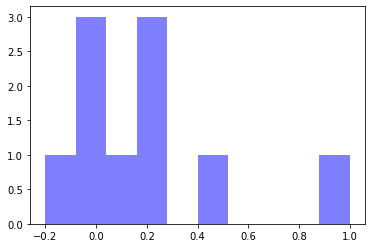

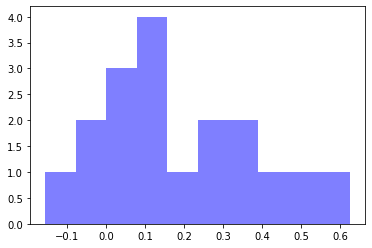

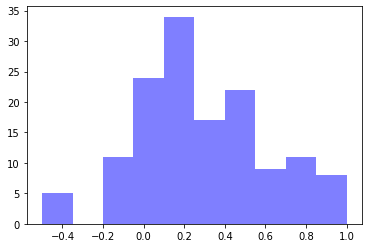

In [40]:
fig = plt.figure()
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
#     print(sub_data_frame)
    
    pol = lambda x: TextBlob(x).sentiment.polarity
    sub = lambda x: TextBlob(x).sentiment.subjectivity
    sub_data_frame['polarity'] = sub_data_frame['review'].apply(pol)
    sub_data_frame['subjectivity'] = sub_data_frame['review'].apply(sub)
    
    num_bins = 10
    n, bins, patches = plt.hist(sub_data_frame.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Polarity')
    plt.ylabel('Number of Reviews')
    plt.title(product)
    fig.add_subplot(4, 3, c)
    plt.show()
    c = c + 1

In [38]:
patches

<a list of 10 Patch objects>